EDA

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("indian_movies.csv")

In [4]:
data

,title,overview,original_language,release_date,genres,popularity,vote_average,vote_count
0,RRR,A fictional history of two legendary revolutio...,Telugu,2022-03-24,"Action, Drama",81.050,7.8,1020
1,Rocky Aur Rani Kii Prem Kahaani,"Gym-freak brat Rocky falls in love with Rani, ...",Hindi,2023-07-28,"Comedy, Drama, Family, Romance",36.450,0.0,0
2,Looop Lapeta,"When her boyfriend loses a mobster's cash, Sav...",Hindi,2022-02-04,"Action, Comedy, Crime",32.521,6.1,56
3,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,Hindi,2009-12-23,"Drama, Comedy",30.949,8.0,2119
4,Voice of Sathyanathan,A man is mistakenly suspected of being a threa...,Malayalam,2023-07-28,"Comedy, Drama",28.323,0.0,0
...,...,...,...,...,...,...,...,...
19946,Thedinen Vandhadhu,A man and his friend try to save a bag contain...,Tamil,1997-10-30,"Comedy, Romance",0.600,6.5,1
19947,Sishya,NaN,Tamil,1997-04-27,Drama,0.600,0.0,0
19948,Seeman,NaN,Tamil,1994-04-15,Drama,0.600,0.0,0
19949,"My Son, My Precious",A teacher comes to a village and an old man as...,Assamese,1981-04-01,NaN,0.600,0.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19951 entries, 0 to 19950
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              19951 non-null  object 
 1   overview           18277 non-null  object 
 2   original_language  19951 non-null  object 
 3   release_date       18058 non-null  object 
 4   genres             15632 non-null  object 
 5   popularity         19951 non-null  float64
 6   vote_average       19951 non-null  float64
 7   vote_count         19951 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


In [6]:
data.head()

,title,overview,original_language,release_date,genres,popularity,vote_average,vote_count
0,RRR,A fictional history of two legendary revolutio...,Telugu,2022-03-24,"Action, Drama",81.050,7.8,1020
1,Rocky Aur Rani Kii Prem Kahaani,"Gym-freak brat Rocky falls in love with Rani, ...",Hindi,2023-07-28,"Comedy, Drama, Family, Romance",36.450,0.0,0
2,Looop Lapeta,"When her boyfriend loses a mobster's cash, Sav...",Hindi,2022-02-04,"Action, Comedy, Crime",32.521,6.1,56
3,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,Hindi,2009-12-23,"Drama, Comedy",30.949,8.0,2119
4,Voice of Sathyanathan,A man is mistakenly suspected of being a threa...,Malayalam,2023-07-28,"Comedy, Drama",28.323,0.0,0


In [7]:
data.shape

(19951, 8)

In [8]:
missing_values = data.isnull().sum()
missing_values

title                   0
overview             1674
original_language       0
release_date         1893
genres               4319
popularity              0
vote_average            0
vote_count              0
dtype: int64

In [9]:
#Removing the Null entries from the data
data = data.dropna()

In [10]:
data.shape

(14115, 8)

In [11]:
data[['popularity',	'vote_average',	'vote_count']]

,popularity,vote_average,vote_count
0,81.050,7.8,1020
1,36.450,0.0,0
2,32.521,6.1,56
3,30.949,8.0,2119
4,28.323,0.0,0
...,...,...,...
19927,0.600,1.0,1
19929,0.600,0.0,0
19931,0.600,0.0,0
19933,0.600,0.0,0


In [12]:
data[['popularity',	'vote_average',	'vote_count']].describe()

,popularity,vote_average,vote_count
count,14115.000000,14115.000000,14115.000000
mean,1.853445,3.778066,8.943110
std,2.085980,3.196575,50.589742
min,0.600000,0.000000,0.000000
25%,0.683000,0.000000,0.000000
50%,1.278000,4.900000,1.000000
75%,2.127000,6.500000,6.000000
max,81.050000,10.000000,4186.000000


In [13]:
#correlation between popularity, vote avg and vote count

correlation_matrix = data[['popularity','vote_average','vote_count']].corr()
print("\ncorrelation matrix:")
correlation_matrix 


correlation matrix:


,popularity,vote_average,vote_count
popularity,1.000000,0.326848,0.524801
vote_average,0.326848,1.000000,0.157826
vote_count,0.524801,0.157826,1.000000


In [14]:
data['release_date'] = pd.to_datetime(data['release_date'],errors='coerce')
data['release_date']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6208\4257224851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'] = pd.to_datetime(data['release_date'],errors='coerce')


0       2022-03-24
1       2023-07-28
2       2022-02-04
3       2009-12-23
4       2023-07-28
           ...    
19927   2007-04-05
19929   1981-08-15
19931   1984-12-06
19933   1985-01-01
19946   1997-10-30
Name: release_date, Length: 14115, dtype: datetime64[ns]

In [15]:
data['release_year'] = data['release_date'].dt.year

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6208\3202849113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_year'] = data['release_date'].dt.year


In [16]:
data['release_year']

0        2022
1        2023
2        2022
3        2009
4        2023
         ... 
19927    2007
19929    1981
19931    1984
19933    1985
19946    1997
Name: release_year, Length: 14115, dtype: int32

In [17]:
data['popularity_ratio'] = data['popularity']/data['vote_count']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6208\3355004327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['popularity_ratio'] = data['popularity']/data['vote_count']


In [18]:
data['popularity_ratio']

0        0.079461
1             inf
2        0.580732
3        0.014605
4             inf
           ...   
19927    0.600000
19929         inf
19931         inf
19933         inf
19946    0.600000
Name: popularity_ratio, Length: 14115, dtype: float64

In [19]:
data = data.drop('release_date',axis=1)

In [20]:
data

,title,overview,original_language,genres,popularity,vote_average,vote_count,release_year,popularity_ratio
0,RRR,A fictional history of two legendary revolutio...,Telugu,"Action, Drama",81.050,7.8,1020,2022,0.079461
1,Rocky Aur Rani Kii Prem Kahaani,"Gym-freak brat Rocky falls in love with Rani, ...",Hindi,"Comedy, Drama, Family, Romance",36.450,0.0,0,2023,inf
2,Looop Lapeta,"When her boyfriend loses a mobster's cash, Sav...",Hindi,"Action, Comedy, Crime",32.521,6.1,56,2022,0.580732
3,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,Hindi,"Drama, Comedy",30.949,8.0,2119,2009,0.014605
4,Voice of Sathyanathan,A man is mistakenly suspected of being a threa...,Malayalam,"Comedy, Drama",28.323,0.0,0,2023,inf
...,...,...,...,...,...,...,...,...,...
19927,Koodal Nagar,Koodal Nagar movie story is set in a suburb of...,Tamil,Drama,0.600,1.0,1,2007,0.600000
19929,Red Jasmine,A remake of the Telugu film Erra Mallelu (1981...,Tamil,"Drama, Action",0.600,0.0,0,1981,inf
19931,January 1,January 1 is a 1984 Tamil-language Indian feat...,Tamil,"Drama, Crime, Thriller",0.600,0.0,0,1984,inf
19933,Annai Bhoomi 3D,Two friends are hired to kill General Prabhaka...,Tamil,Drama,0.600,0.0,0,1985,inf


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

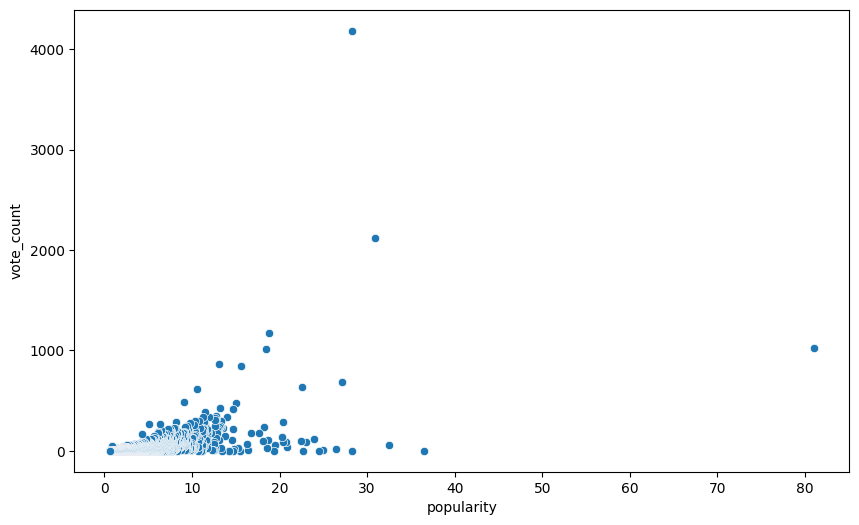

In [22]:
 

plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='popularity',y='vote_count')
plt.show()

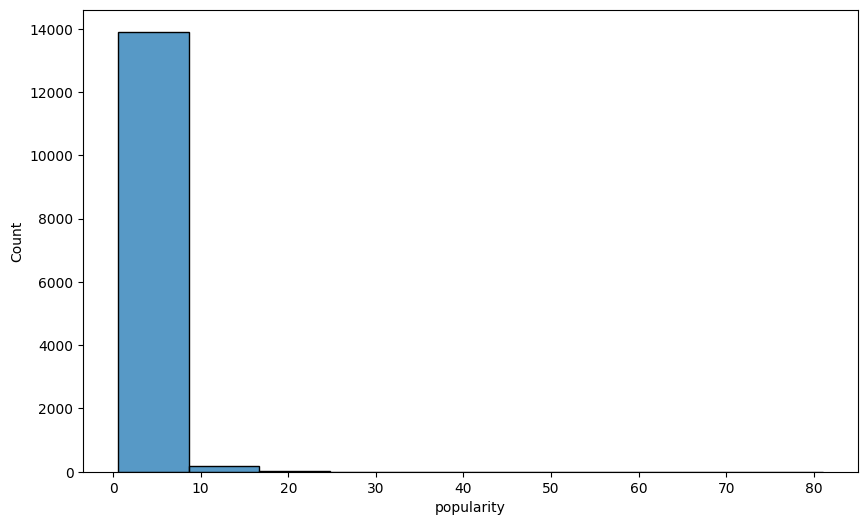

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='popularity',bins=10)
plt.show()

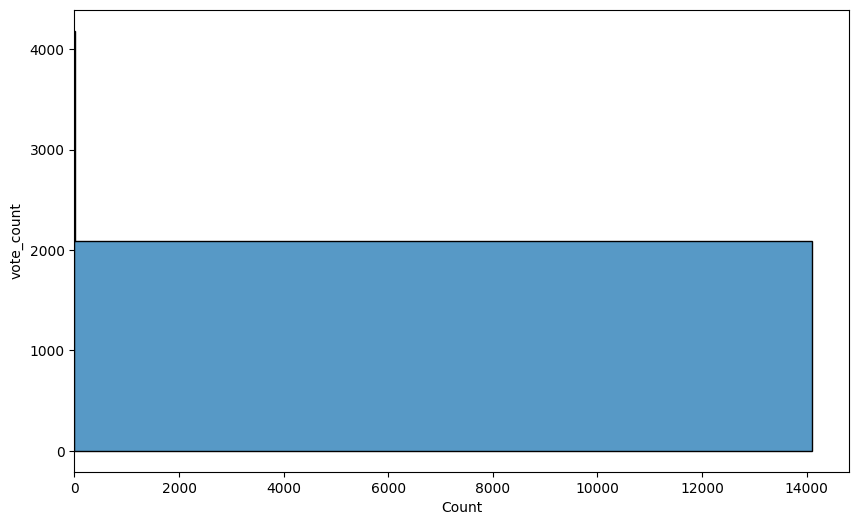

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, bins=2,y='vote_count')
plt.show()

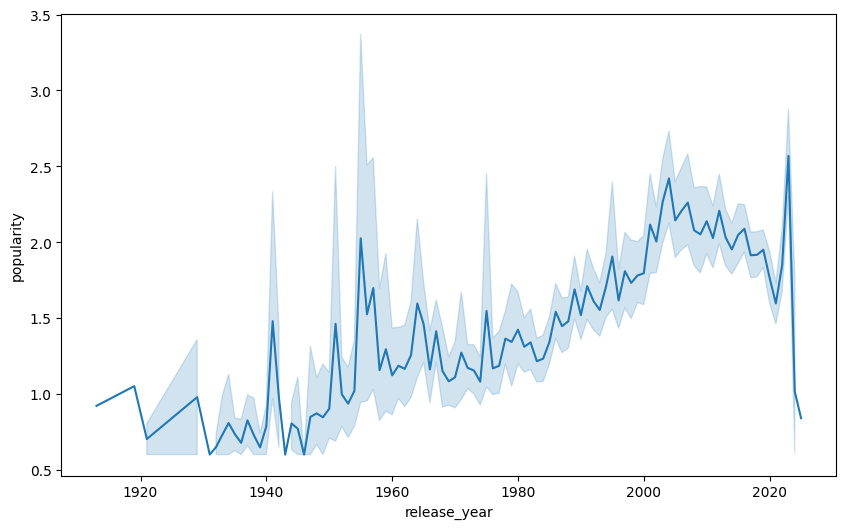

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='release_year',y='popularity')
plt.show()

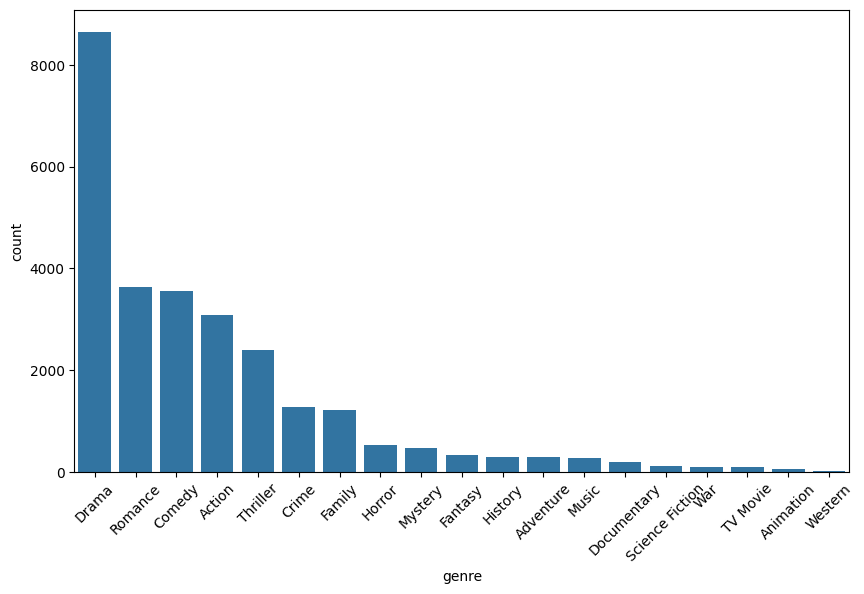

In [28]:
genre_data = data['genres'].str.split(', ').explode()
genre_counts = genre_data.value_counts().reset_index()
genre_counts.columns = ['genre', 'count']   # rename columns properly

plt.figure(figsize=(10,6))
sns.barplot(data=genre_counts, x='genre', y='count')
plt.xticks(rotation=45)   # rotate for readability

plt.show()


In [29]:
highly_rated_popular=data[(data['vote_average']>=4.0)&(data['popularity']>=15)]

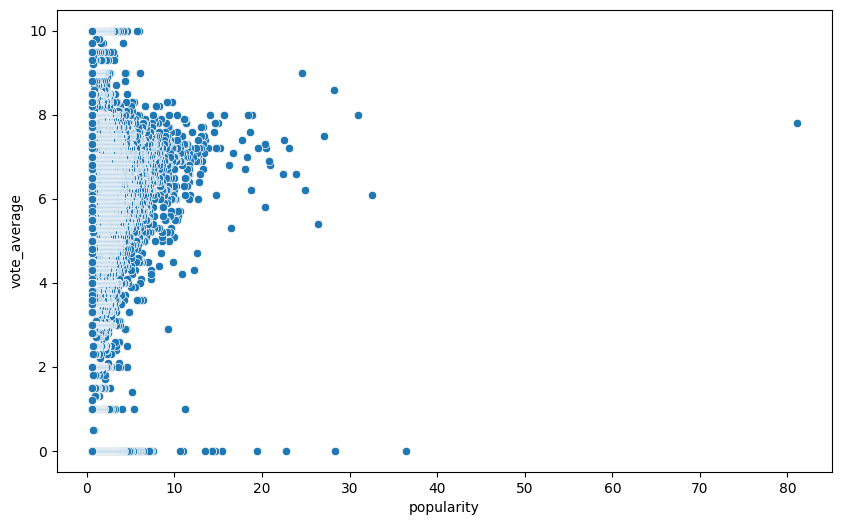

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='popularity',y='vote_average')
plt.show()